# Documents Classification using Machine Learning

## Introducing the 20newsgroups dataset

The 20 Newsgroups data set is a collection of approximately <b>20,000</b> newsgroup documents, partitioned (nearly) evenly across <b>20</b> different newsgroups.The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.<br></br>
For more information, click this link: [20newsgroups Dataset](http://qwone.com/~jason/20Newsgroups/)


## Machine learning on the 20newsgroups dataset

- Framed as a **supervised learning** problem: Predict the label (class) of test document
- Famous dataset for machine learning of **text classificaton**
- Learn more about the 20newsgroups dataset: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups)

In [1]:
# import required modules
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

%matplotlib inline

## Loading the 20newsgroups  dataset into scikit-learn

In [2]:
# import 20 newsgroup dataset
from sklearn.datasets import fetch_20newsgroups

#categories = ['alt.atheism', 'comp.graphics', 'sci.space']
categories = None
data_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=categories)
data_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=categories)

In [3]:
type(data_train)
type(data_test)

sklearn.datasets.base.Bunch

In [4]:
print "Train data target labels:",data_train.target
print "Test data target labels:",data_test.target

Train data target labels: [7 4 4 ..., 3 1 8]
Test data target labels: [ 7  5  0 ...,  9  6 15]


In [5]:
print "Train data target names:",data_train.target_names
print "Test data target names:",data_test.target_names

Train data target names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Test data target names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
print "Total train data:",len(data_train.data)
print "Total test data:",len(data_test.data)

Total train data: 11314
Total test data: 7532


In [7]:
# Train data type
print type(data_train.data)
print type(data_train.target)

# Test data type
print type(data_test.data)
print type(data_test.target)

<type 'list'>
<type 'numpy.ndarray'>
<type 'list'>
<type 'numpy.ndarray'>


## Requirements for working with data in scikit-learn

1. Features and response are **separate objects**
2. Features and response should be **numeric**
3. Features and response should be **NumPy arrays**
4. Features and response should have **specific shapes**

In [8]:
# So, first converting text data into vectors of numerical values using tf-idf to form feature vector
vectorizer = TfidfVectorizer()
data_train_vectors = vectorizer.fit_transform(data_train.data)
data_test_vectors = vectorizer.transform(data_test.data) 

In [9]:
# Train data type
print type(data_train_vectors.data)
print type(data_train.target)

# Test data type
print type(data_train_vectors.data)
print type(data_train.target)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [10]:
# check the shape of the features matrix
print data_train_vectors.shape

(11314, 101631)


In [11]:
# check the shape of the response (single dimension matching the number of observations)
print data_train.target.shape

(11314L,)


## Train \ Test data 

In [12]:
# store training feature matrix in "Xtr"
Xtr = data_train_vectors
print "Xtr:\n", Xtr

# store training response vector in "ytr"
ytr = data_train.target
print "ytr:",ytr

Xtr:
  (0, 59216)	0.0872526827011
  (0, 71850)	0.0761658508869
  (0, 57393)	0.0923857759707
  (0, 41979)	0.195069480982
  (0, 45885)	0.0411672635852
  (0, 100208)	0.0416291225185
  (0, 49932)	0.103116144671
  (0, 96395)	0.10736893401
  (0, 68409)	0.0457941071124
  (0, 46814)	0.108626313238
  (0, 59079)	0.0840950136083
  (0, 96433)	0.0742475462273
  (0, 73373)	0.140228581546
  (0, 99911)	0.0818197705882
  (0, 84276)	0.141855528042
  (0, 37287)	0.124585099834
  (0, 64931)	0.0927909404129
  (0, 62746)	0.113257219987
  (0, 88143)	0.224203549607
  (0, 25590)	0.0488708773242
  (0, 54632)	0.0604800703909
  (0, 17936)	0.0526638552253
  (0, 51136)	0.068655217054
  (0, 23480)	0.112386837086
  (0, 67670)	0.064565729407
  :	:
  (11313, 81742)	0.13241254414
  (11313, 81792)	0.148044990585
  (11313, 40387)	0.086720684874
  (11313, 47209)	0.153034004688
  (11313, 25475)	0.133738870485
  (11313, 90644)	0.117168551993
  (11313, 6044)	0.209189970091
  (11313, 44748)	0.110703489964
  (11313, 22529)	0.091

In [13]:
# store testing feature matrix in "Xtt"
Xtt = data_test_vectors
print "Xtt:\n", Xtt

# store testing response vector in "ytt"
ytt = data_test.target
print "ytt:",ytt

Xtt:
  (0, 100208)	0.0455265206524
  (0, 99908)	0.093326167713
  (0, 97240)	0.119512589566
  (0, 96391)	0.058675731151
  (0, 93592)	0.247721155424
  (0, 92955)	0.115411039348
  (0, 89360)	0.0656210371508
  (0, 89092)	0.145925093214
  (0, 88767)	0.0448472215507
  (0, 88694)	0.0560951202705
  (0, 88578)	0.0715460832619
  (0, 88532)	0.239552815217
  (0, 88519)	0.0392163919275
  (0, 88501)	0.0699831480903
  (0, 88138)	0.0966113050341
  (0, 86307)	0.142144430841
  (0, 84598)	0.154770363794
  (0, 83888)	0.0932290328731
  (0, 81241)	0.146212829056
  (0, 72905)	0.245193915077
  (0, 70695)	0.127691460614
  (0, 68781)	0.0679543906565
  (0, 68409)	0.0500814390763
  (0, 68080)	0.0453586773273
  (0, 67670)	0.141220993163
  :	:
  (7531, 54632)	0.0717948768331
  (7531, 51223)	0.111594707095
  (7531, 51136)	0.16299891255
  (7531, 48650)	0.112689731162
  (7531, 47204)	0.374265101335
  (7531, 46718)	0.102599532796
  (7531, 41127)	0.087588859453
  (7531, 40395)	0.124204267424
  (7531, 39397)	0.1458742224

## Different Classification Models

## Multinomial Naive Bayes (MNB) classification

In [14]:
# import the required module from scikit learn
from sklearn.naive_bayes import MultinomialNB

In [15]:
# Implementing classification model- using MultinomialNB

# Instantiate the estimator
clf_MNB = MultinomialNB(alpha=.01)

# Fit the model with data (aka "model training")
clf_MNB.fit(Xtr, ytr)

# Predict the response for a new observation
y_pred = clf_MNB.predict(Xtt)
print "Predicted Class Labels:",y_pred

# Predict the response score for a new observation
y_pred_score_mnb = clf_MNB.predict_proba(Xtt)
print "Predicted Score:\n",y_pred_score_mnb

Predicted Class Labels: [ 7  1 15 ..., 11 12 15]
Predicted Score:
[[  2.33922785e-03   8.00299678e-02   5.93857193e-03 ...,   2.58534569e-03
    6.01529617e-03   6.78500079e-04]
 [  4.09205377e-04   8.04813630e-01   1.13113063e-02 ...,   1.04980678e-03
    3.35421853e-03   1.16458819e-03]
 [  1.10022079e-01   2.82942568e-02   7.20466138e-02 ...,   5.75209783e-02
    6.36329151e-02   9.95471475e-02]
 ..., 
 [  1.67251951e-02   6.17838347e-03   2.72529039e-03 ...,   4.08349633e-02
    9.15576372e-02   1.31169817e-02]
 [  5.24325557e-07   1.91154890e-02   2.66689839e-03 ...,   4.54799138e-07
    1.10886936e-06   6.03922247e-06]
 [  3.69430453e-01   1.14028576e-04   6.52564849e-05 ...,   1.64443397e-03
    2.64732509e-02   9.27623133e-02]]


## K-Nearest Neighbors (KNN) classification

In [16]:
# import the required module from scikit learn
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# Implementing classification model- using KNeighborsClassifier

# Instantiate the estimator
clf_knn =  KNeighborsClassifier(n_neighbors=5)

# Fit the model with data (aka "model training")
clf_knn.fit(Xtr, ytr)

# Predict the response for a new observation
y_pred = clf_knn.predict(Xtt)
print "Predicted Class Labels:",y_pred

# Predict the response score for a new observation
y_pred_score_knn = clf_knn.predict_proba(Xtt)
print "Predicted Score:\n",y_pred_score_knn

Predicted Class Labels: [2 7 2 ..., 1 2 2]
Predicted Score:
[[ 0.2  0.   0.4 ...,  0.2  0.   0. ]
 [ 0.   0.   0.  ...,  0.   0.   0. ]
 [ 0.   0.   0.2 ...,  0.   0.   0. ]
 ..., 
 [ 0.   0.2  0.2 ...,  0.2  0.2  0. ]
 [ 0.   0.   0.2 ...,  0.   0.   0. ]
 [ 0.   0.   0.2 ...,  0.   0.   0. ]]


## Support Vector Machine (SVM) classification

In [18]:
# import the required module from scikit learn
from sklearn.svm import LinearSVC

In [19]:
# Implementing classification model- using LinearSVC

# Instantiate the estimator
clf_svc =  LinearSVC()

# Fit the model with data (aka "model training")
clf_svc.fit(Xtr, ytr)

# Predict the response for a new observation
y_pred = clf_svc.predict(Xtt)
print "Predicted Class Labels:",y_pred

# Predict the response score for a new observation
y_pred_score_svc = clf_svc.decision_function(Xtt)
print "Predicted Score:\n",y_pred_score_svc

Predicted Class Labels: [ 4  1  2 ..., 18 12 15]
Predicted Score:
[[-1.00264925 -1.02086955 -1.31263409 ..., -1.32426242 -1.45006139
  -1.77646865]
 [-1.16551333 -0.19647563 -1.31166917 ..., -1.00053452 -1.05620841
  -1.17412623]
 [-0.79778336 -0.76567699 -0.55615937 ..., -1.23778132 -0.5886194
  -0.65226108]
 ..., 
 [-0.86571781 -0.93075274 -0.97247373 ..., -1.25583332 -0.70698701
  -1.54958409]
 [-1.13826348 -1.27762804 -1.60415669 ..., -1.20570482 -1.26850329
  -1.09733552]
 [-0.57326675 -1.0674448  -1.44547256 ..., -1.36574493 -0.98845464
  -0.80889072]]


## Evaluating & Comparing Machine Learning Models

### Cross-Validation: K-fold
- Measurement of Generalization Performance
- For estimation of variation 
- Divide the data into K folds <br></br>
    - For k = 1…K <br></br>
        • Train on K-1 sets leaving the kth set out for validation <br></br>
        • Validate on the kth set and obtain the performance metrics 
- Report the average and the variation in the performance

Diagram of **5-fold cross-validation:**

![5-fold cross-validation](images/07_cross_validation_diagram.png)

## Cross-validation: Model Selection

In [21]:
# import the required module
from sklearn.cross_validation import cross_val_score

In [22]:
# 10-fold cross-validation with MNB model
clf_mnb = MultinomialNB(alpha=.01)
print "MultinomialNB 10-Cross Validation Score:",cross_val_score(clf_mnb, Xtr, ytr, cv=10, scoring='accuracy').mean()

MultinomialNB 10-Cross Validation Score: 0.773939325651


In [23]:
# 10-fold cross-validation with KNN model
clf_knn = KNeighborsClassifier(n_neighbors=55)
print "KNN 10-Cross Validation Score:",cross_val_score(clf_knn, Xtr, ytr, cv=10, scoring='accuracy').mean()

KNN 10-Cross Validation Score: 0.0683138771375


In [24]:
# 10-fold cross-validation with Linear SVM model
clf_svc = LinearSVC(C=1)
print "KNN 10-Cross Validation Score:",cross_val_score(clf_svc, Xtr, ytr, cv=10, scoring='accuracy').mean()

KNN 10-Cross Validation Score: 0.766855473879


## Efficiently searching for optimal tuning parameters

## More efficient parameter tuning using `GridSearchCV`

Allows to define a **grid of parameters** that will be **searched** using K-fold cross-validation

In [25]:
# importing the required module
from sklearn.grid_search import GridSearchCV

### `GridSearchCV` for KNN

In [26]:
# define the parameter values that should be searched for KNN
k_range = range(1, 100)
weight_options = ['uniform', 'distance']
print k_range
print weight_options

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
['uniform', 'distance']


In [27]:
# create a parameter grid: map the parameter names to the values that should be searched for KNN
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'weights': ['uniform', 'distance']}


In [28]:
# instantiate the grid
grid = GridSearchCV(clf_knn, param_grid, cv=10, scoring='accuracy')

In [29]:
# fit the grid with data
grid.fit(Xtr, ytr)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=55, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [30]:
# view the complete results (list of named tuples)
grid.grid_scores_

[mean: 0.17589, std: 0.01090, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.17589, std: 0.01090, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.11154, std: 0.00624, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.17598, std: 0.01082, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.09705, std: 0.00709, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.11526, std: 0.01871, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.11543, std: 0.00745, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.16360, std: 0.01220, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.10695, std: 0.00704, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.15043, std: 0.01111, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.10368, std: 0.00358, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.14327, std: 0.00783, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.10412, std: 0.00515, para

In [31]:
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score

{'n_neighbors': 1, 'weights': 'uniform'}
[ 0.16578947  0.16344464  0.16608084  0.1971831   0.1819788   0.18689105
  0.17375887  0.18206039  0.16281139  0.17898486]
0.175888280007


In [32]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.175976666077
{'n_neighbors': 2, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='distance')


### Reducing computational expense using `RandomizedSearchCV` for KNN

- Searching many different parameters at once may be computationally infeasible
- `RandomizedSearchCV` searches a subset of the parameters, and we control the computational "budget"

In [33]:
# importing the required module
from sklearn.grid_search import RandomizedSearchCV

In [34]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)
print param_dist

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'weights': ['uniform', 'distance']}


In [35]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(clf_knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(Xtr, ytr)
rand.grid_scores_

[mean: 0.08856, std: 0.00766, params: {'n_neighbors': 50, 'weights': 'distance'},
 mean: 0.07884, std: 0.00599, params: {'n_neighbors': 95, 'weights': 'distance'},
 mean: 0.06850, std: 0.00664, params: {'n_neighbors': 60, 'weights': 'uniform'},
 mean: 0.06629, std: 0.00583, params: {'n_neighbors': 73, 'weights': 'uniform'},
 mean: 0.09448, std: 0.00611, params: {'n_neighbors': 37, 'weights': 'distance'},
 mean: 0.10695, std: 0.00704, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.06514, std: 0.00644, params: {'n_neighbors': 96, 'weights': 'uniform'},
 mean: 0.07964, std: 0.00746, params: {'n_neighbors': 78, 'weights': 'distance'},
 mean: 0.06832, std: 0.00682, params: {'n_neighbors': 57, 'weights': 'uniform'},
 mean: 0.06585, std: 0.00553, params: {'n_neighbors': 80, 'weights': 'uniform'}]

In [36]:
# examine the best model
print rand.best_score_
print rand.best_params_

0.10694714513
{'n_neighbors': 5, 'weights': 'uniform'}


### `GridSearchCV` for Multinomial Naive Bayes

In [48]:
# define the parameter values that should be searched for MNB
alpha = [0.001, 0.01, 0.1, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

print alpha

[0.001, 0.01, 0.1, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [49]:
# create a parameter grid: map the parameter names to the values that should be searched for MNB
param_grid = dict(alpha=alpha)
print param_grid

{'alpha': [0.001, 0.01, 0.1, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}


In [50]:
# instantiate the grid
grid = GridSearchCV(clf_mnb, param_grid, cv=10, scoring='accuracy')

In [51]:
# fit the grid with data
grid.fit(Xtr, ytr)

C:\Anaconda2\lib\site-packages\sklearn\naive_bayes.py:664: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)


GridSearchCV(cv=10, error_score='raise',
       estimator=MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [52]:
# view the complete results (list of named tuples)
grid.grid_scores_

[mean: 0.76419, std: 0.01603, params: {'alpha': 0.001},
 mean: 0.77391, std: 0.01550, params: {'alpha': 0.01},
 mean: 0.74562, std: 0.01456, params: {'alpha': 0.1},
 mean: 0.14363, std: 0.00826, params: {'alpha': 0},
 mean: 0.41807, std: 0.01398, params: {'alpha': 10},
 mean: 0.33693, std: 0.01094, params: {'alpha': 20},
 mean: 0.29521, std: 0.01201, params: {'alpha': 30},
 mean: 0.26807, std: 0.01199, params: {'alpha': 40},
 mean: 0.24960, std: 0.01116, params: {'alpha': 50},
 mean: 0.23573, std: 0.01013, params: {'alpha': 60},
 mean: 0.22406, std: 0.00972, params: {'alpha': 70},
 mean: 0.21398, std: 0.00953, params: {'alpha': 80},
 mean: 0.20435, std: 0.00819, params: {'alpha': 90},
 mean: 0.19710, std: 0.00771, params: {'alpha': 100}]

In [53]:
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score

{'alpha': 0.001}
[ 0.75964912  0.75307557  0.74516696  0.76408451  0.79151943  0.75199291
  0.79166667  0.75133215  0.77758007  0.75601069]
0.764185964292


In [54]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.773908432031
{'alpha': 0.01}
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)


### `GridSearchCV` for Linear SVM

In [92]:
# define the parameter values that should be searched for Linear SVM
C = range(1,100,10)
tol = [1e-2, 1e-4, 1e-9]

print "C:", C
print "Tolerance for stopping criteria:", tol

C: [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]
Tolerance for stopping criteria: [0.01, 0.0001, 1e-09]


In [93]:
# create a parameter grid: map the parameter names to the values that should be searched for SVM
param_grid = dict(C=C, tol=tol)
print param_grid

{'C': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91], 'tol': [0.01, 0.0001, 1e-09]}


In [94]:
# instantiate the grid
grid = GridSearchCV(clf_svc, param_grid, cv=10, scoring='accuracy')

In [96]:
# fit the grid with data
grid.fit(Xtr, ytr)

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.01,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91], 'tol': [0.01, 0.0001, 1e-09]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [97]:
# view the complete results (list of named tuples)
grid.grid_scores_

[mean: 0.76693, std: 0.00953, params: {'C': 1, 'tol': 0.01},
 mean: 0.76684, std: 0.00954, params: {'C': 1, 'tol': 0.0001},
 mean: 0.76684, std: 0.00954, params: {'C': 1, 'tol': 1e-09},
 mean: 0.75155, std: 0.01115, params: {'C': 11, 'tol': 0.01},
 mean: 0.75155, std: 0.01115, params: {'C': 11, 'tol': 0.0001},
 mean: 0.75155, std: 0.01115, params: {'C': 11, 'tol': 1e-09},
 mean: 0.74881, std: 0.01074, params: {'C': 21, 'tol': 0.01},
 mean: 0.74881, std: 0.01074, params: {'C': 21, 'tol': 0.0001},
 mean: 0.74881, std: 0.01074, params: {'C': 21, 'tol': 1e-09},
 mean: 0.74792, std: 0.01128, params: {'C': 31, 'tol': 0.01},
 mean: 0.74792, std: 0.01128, params: {'C': 31, 'tol': 0.0001},
 mean: 0.74792, std: 0.01128, params: {'C': 31, 'tol': 1e-09},
 mean: 0.74686, std: 0.01059, params: {'C': 41, 'tol': 0.01},
 mean: 0.74695, std: 0.01038, params: {'C': 41, 'tol': 0.0001},
 mean: 0.74695, std: 0.01038, params: {'C': 41, 'tol': 1e-09},
 mean: 0.74713, std: 0.01071, params: {'C': 51, 'tol': 0.0

In [98]:
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score

{'C': 1, 'tol': 0.01}
[ 0.76052632  0.7513181   0.76625659  0.77376761  0.77120141  0.75642161
  0.78280142  0.76731794  0.77935943  0.76046305]
0.766925932473


In [99]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.766925932473
{'C': 1, 'tol': 0.01}
LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.01,
     verbose=0)


### Reducing computational expense using `RandomizedSearchCV` for SVM

In [100]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(C=C, tol=tol)
print param_dist

{'C': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91], 'tol': [0.01, 0.0001, 1e-09]}


In [60]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(clf_svc, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(Xtr, ytr)
rand.grid_scores_

[mean: 0.75155, std: 0.01115, params: {'C': 11, 'tol': 0.01},
 mean: 0.74695, std: 0.01038, params: {'C': 41, 'tol': 1e-09},
 mean: 0.74704, std: 0.01066, params: {'C': 51, 'tol': 0.01},
 mean: 0.74465, std: 0.01092, params: {'C': 91, 'tol': 1e-09},
 mean: 0.74863, std: 0.01066, params: {'C': 21, 'tol': 0.01},
 mean: 0.74633, std: 0.01105, params: {'C': 71, 'tol': 0.0001},
 mean: 0.74695, std: 0.01056, params: {'C': 51, 'tol': 0.0001},
 mean: 0.74801, std: 0.01140, params: {'C': 31, 'tol': 0.01},
 mean: 0.74881, std: 0.01074, params: {'C': 21, 'tol': 1e-09},
 mean: 0.75155, std: 0.01115, params: {'C': 11, 'tol': 0.0001}]

In [61]:
# examine the best model
print rand.best_score_
print rand.best_params_

0.751546756231
{'C': 11, 'tol': 0.01}


## Classification Accuracy

- percentage of correct predictions

In [25]:
# importing the required module
from sklearn import metrics

### Classification Accuracy of MultinomialNB

In [26]:
# Instantiate the estimator
clf_MNB = MultinomialNB(alpha=.01)

# Fit the model with data (aka "model training")
clf_MNB.fit(Xtr, ytr)

# Predict the response for a new observation
y_pred_mnb = clf_MNB.predict(Xtt)
print "Predicted Class Labels:",y_pred_mnb

# calculate accuracy
print "Classification Accuracy:",metrics.accuracy_score(ytt, y_pred_mnb)

Predicted Class Labels: [ 7  1 15 ..., 11 12 15]
Classification Accuracy: 0.700212426978


### Classification Accuracy of KNN

In [27]:
# Instantiate the estimator
clf_knn =  KNeighborsClassifier(n_neighbors=1, weight='distance')

# Fit the model with data (aka "model training")
clf_knn.fit(Xtr, ytr)

# Predict the response for a new observation
y_pred_knn = clf_knn.predict(Xtt)
print "Predicted Class Labels:",y_pred_knn

# calculate accuracy
print "Classification Accuracy:",metrics.accuracy_score(ytt, y_pred_knn)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: Passing additional arguments to the metric function as **kwargs is deprecated and will no longer be supported in 0.18. Use metric_params instead.
  from ipykernel import kernelapp as app


Predicted Class Labels: [4 4 4 ..., 4 4 4]
Classification Accuracy: 0.113382899628


### Classification Accuracy of Linear SVM

In [28]:
# Instantiate the estimator
clf_svc =  LinearSVC(C=1, tol=0.01)

# Fit the model with data (aka "model training")
clf_svc.fit(Xtr, ytr)

# Predict the response for a new observation
y_pred_svc = clf_svc.predict(Xtt)
print "Predicted Class Labels:",y_pred_svc

# calculate accuracy
print "Classification Accuracy:",metrics.accuracy_score(ytt, y_pred_svc)

Predicted Class Labels: [ 4  1  2 ..., 18 12 15]
Classification Accuracy: 0.691980881572


## Confusion matrix

- Table that describes the performance of a classification model

### Confusion matrix of MultinomialNB

In [29]:
# first argument is true values, second argument is predicted values
print metrics.confusion_matrix(ytt, y_pred_mnb)

[[141   1   2   2   1   2   0   3   5   2  10   4   1   2  10  79  12  13
   10  19]
 [  4 278  10  16  16  24   4   0   3   1   5  11   3   1   7   4   0   2
    0   0]
 [  4  26 205  65  10  24   3   1   5   0  16  12   2   3   7   2   0   1
    5   3]
 [  0  11  27 279  32   2   9   4   0   0   8   3  17   0   0   0   0   0
    0   0]
 [  0  11   7  33 268   3   8   6   2   0  15   6  15   2   6   1   2   0
    0   0]
 [  0  46  14   7   6 293   4   0   0   1   5   7   5   2   3   1   1   0
    0   0]
 [  0   3   1  30  21   0 280  15   7   2  11   1   8   1   6   1   2   0
    1   0]
 [  1   1   1   1   0   0   8 289  31   0  24   4   9   3   6   3   6   2
    7   0]
 [  6   2   1   1   2   2   5  28 292   2  13   0   8   6   4   6  10   3
    6   1]
 [  5   3   0   0   0   1   5   0   4 321  30   4   1   4   3   5   3   2
    6   0]
 [  4   0   0   0   0   1   0   1   2   5 373   3   0   1   2   6   1   0
    0   0]
 [  1  12   5   3   3   1   1   0   4   3  16 298   3   1   5   7

### Confusion matrix of KNN

In [30]:
# first argument is true values, second argument is predicted values
print metrics.confusion_matrix(ytt, y_pred_knn)

[[ 21   0   0   0 291   0   0   1   1   0   0   3   0   0   0   1   0   0
    0   1]
 [  0  20   0   0 368   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0  12   1 376   1   0   0   0   0   0   0   1   0   2   0   0   0
    0   1]
 [  0   1   2  38 350   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0 385   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1   1   2 366  25   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   1 337   0  45   0   1   4   0   0   2   0   0   0   0   0
    0   0]
 [  0   0   0   0 383   1   0  11   1   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   1   0 371   0   0   0  26   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 382   0   0   0   0  15   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 354   0   0   0   1   0  43   0   0   1   0   0   0   0
    0   0]
 [  0   0   1   0 363   0   0   0   0   0   1  27   0   0   0   0

### Confusion matrix of Linear SVM

In [31]:
# first argument is true values, second argument is predicted values
print metrics.confusion_matrix(ytt, y_pred_svc)

[[157   2   3   2   1   0   2   7   6  12   1   2   8   8  11  44   6  13
    8  26]
 [  6 278  18   8   6  24   5   3   3  10   0   6   8   0   8   1   2   2
    1   0]
 [  4  19 242  37  18  14   3   3   2  18   2   2   2   4   9   1   2   3
    6   3]
 [  0  12  37 254  22   9  13   2   0   8   1   2  27   0   2   0   0   0
    3   0]
 [  2   3  10  35 267   4   9   6   5  14   1   4  15   0   4   2   3   0
    1   0]
 [  0  47  36   9   4 273   2   0   1   6   0   3   4   2   5   1   0   0
    0   2]
 [  1   3   6  14  12   0 311   6   6  11   2   1   7   0   0   2   4   1
    2   1]
 [  6   1   4   3   2   2  12 282  15  28   2   1  13   3   6   1   3   5
    6   1]
 [  2   3   4   1   3   0   4  21 302  16   1   0   8   7   7   5   4   2
    6   2]
 [  3   2   0   4   1   1   7   3   6 329  20   1   1   4   1   6   1   0
    7   0]
 [  1   2   1   0   2   0   1   3   2  23 345   2   1   3   3   2   4   1
    0   3]
 [  4   7   7   3   4   4   6   3   3  19   3 282  10   2   4   4

## Metrics computed from a confusion matrix

**Classification Error:** Overall, how often is the classifier incorrect?

- Also known as "Misclassification Rate"

In [32]:
print "Classification Error of MultinomialNB:", 1 - metrics.accuracy_score(ytt, y_pred_mnb)
print "Classification Error of KNN:", 1 - metrics.accuracy_score(ytt, y_pred_knn)
print "Classification Error of LinearSVC:", 1 - metrics.accuracy_score(ytt, y_pred_svc)

Classification Error of MultinomialNB: 0.299787573022
Classification Error of KNN: 0.886617100372
Classification Error of LinearSVC: 0.308019118428


**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [33]:
print "Sensitivity of MultinomialNB:",metrics.recall_score(ytt, y_pred_mnb, average='weighted')
print "Sensitivity of KNN:",metrics.recall_score(ytt, y_pred_knn, average='weighted')
print "Sensitivity of LinearSVC:",metrics.recall_score(ytt, y_pred_svc, average='weighted')

Sensitivity of MultinomialNB: 0.700212426978
Sensitivity of KNN: 0.113382899628
Sensitivity of LinearSVC: 0.691980881572


**Precision:** When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?
- TP / (TP + FP)

In [34]:
print "Precision of MultinomialNB:", metrics.precision_score(ytt, y_pred_mnb, average='weighted')
print "Precision of KNN:", metrics.precision_score(ytt, y_pred_knn, average='weighted')
print "Precision of LinearSVC:", metrics.precision_score(ytt, y_pred_svc, average='weighted')

Precision of MultinomialNB: 0.708195639892
Precision of KNN: 0.786268523483
Precision of LinearSVC: 0.69598233188


**F-measure:** 
- 2 * P * R / (P + R) 

In [35]:
print "F-measure of MultinomialNB:", metrics.f1_score(ytt, y_pred_mnb, average='weighted')
print "F-measure of KNN:", metrics.f1_score(ytt, y_pred_knn, average='weighted')
print "F-measure of LinearSVC:", metrics.f1_score(ytt, y_pred_svc, average='weighted')

F-measure of MultinomialNB: 0.694315231835
F-measure of KNN: 0.119338786752
F-measure of LinearSVC: 0.690592949377


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / (TN + FP)

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?
- FP / (TN + FP)

**True Positive Rate:** When the actual value is positive, how often is the prediction correct?
- TP / (TP + FP)

## ROC Curves and Area Under the Curve (AUC)

In [36]:
# importing the required modules
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [70]:
def ROC_multi_class(Xtr, ytr, Xtt, ytt, clf):
    
    classes = [0,1, 2, 3, 4]
    # Binarize the output
    ytr = label_binarize(ytr, classes=classes)
    n_classes = ytr.shape[1]
    
    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(clf)
    classifier.fit(Xtr, ytr)
    if (clf == clf_svc):
        y_pred_score = classifier.decision_function(Xtt)
    else:
        y_pred_score = classifier.predict_proba(Xtt)
    
    ytt = label_binarize(ytt, classes=classes)
    
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(ytt[:, i], y_pred_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    
    # Plot ROC curves for the multiclass
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                       ''.format(i+1, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC of multi-class')
    plt.legend(loc="lower right")
    plt.show()

### Multi-class ROC of Multinomial Naive Bayes

ROC and AUC of MultinomialNB


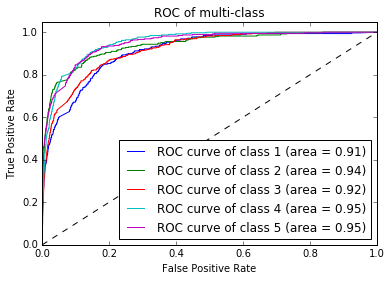

In [71]:
# ROC for MultinomialNB
print "ROC and AUC of MultinomialNB"
ROC_multi_class(Xtr, ytr, Xtt, ytt, clf_MNB)

ROC and AUC of KNN


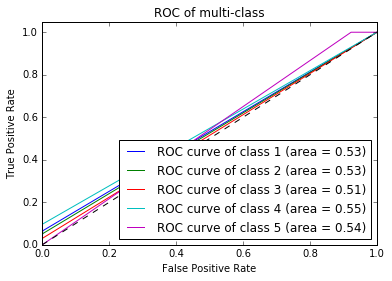

In [72]:
# ROC for KNeighborsClassifier
print "ROC and AUC of KNN"
ROC_multi_class(Xtr, ytr, Xtt, ytt, clf_knn)

ROC and AUC of LinearSVC


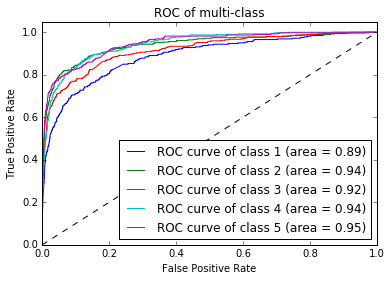

In [73]:
# ROC for LinearSVC
print "ROC and AUC of LinearSVC"
ROC_multi_class(Xtr, ytr, Xtt, ytt, clf_svc)

## PR Curves and Area Under the Curve PR (AUC-PR)

In [41]:
# importing the required module
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [74]:
def PR_multi_class(Xtr, ytr, Xtt, ytt, clf):
    
    classes = [0,1, 2, 3, 4]
    # Binarize the output
    ytr = label_binarize(ytr, classes=classes)
    n_classes = ytr.shape[1]
    
    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(clf)
    classifier.fit(Xtr, ytr)
    if (clf == clf_svc):
        y_pred_score = classifier.decision_function(Xtt)
    else:
        y_pred_score = classifier.predict_proba(Xtt)
    
    ytt = label_binarize(ytt, classes=classes)
    
    # Compute Precision-Recall and plot curve
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(ytt[:, i], y_pred_score[:, i])
        average_precision[i] = average_precision_score(ytt[:, i], y_pred_score[:, i])
    
    for i in range(n_classes):
        plt.plot(recall[i], precision[i], label='PR curve of class {0} (area = {1:0.2f})'
                       ''.format(i+1, average_precision[i]))
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve of multi-class')
    plt.legend(loc="lower right")
    plt.show()

PR and AUC of MultinomialNB


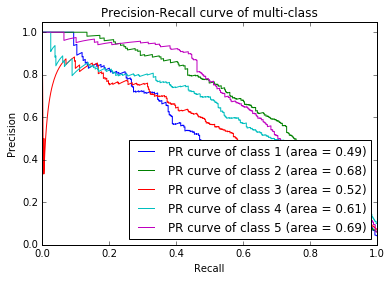

In [75]:
# PR curve of MultinomialNB
print "PR and AUC of MultinomialNB"
PR_multi_class(Xtr, ytr, Xtt, ytt, clf_MNB)

PR and AUC of KNN


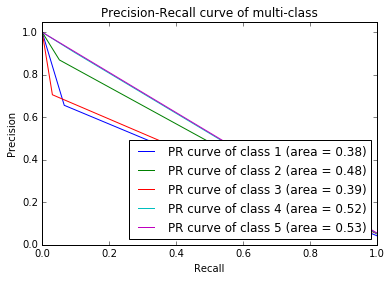

In [76]:
# PR curve of KNeighborsClassifier
print "PR and AUC of KNN"
PR_multi_class(Xtr, ytr, Xtt, ytt, clf_knn)

PR and AUC of LinearSVC


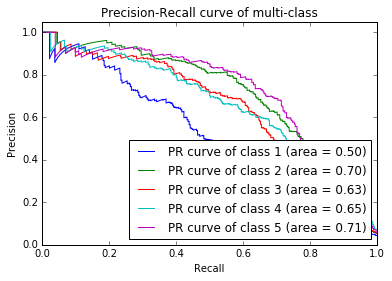

In [77]:
# PR curve of LinearSVC
print "PR and AUC of LinearSVC"
PR_multi_class(Xtr, ytr, Xtt, ytt, clf_svc)

## Benchmarking of Different Classifiers

Diagram of **Benchmarking of different Classifiers:**

![benchmarking](images/benchmark.png)

## References

- http://scikit-learn.org/stable/modules/svm.html
- http://scikit-learn.org/stable/tutorial/basic/tutorial.html
- http://scikitlearn.org/stable/modules/grid_search.html
- http://scikit-learn.org/stable/datasets/twenty_newsgroups.html
- http://scikit-learn.org/stable/auto_examples/text/document_classification_20newsgroups.html#example-text-document-classification-20newsgroups-py
- http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html#example-model-selection-grid-search-text-feature-extraction-py
- https://en.wikipedia.org/wiki/Sensitivity_and_specificity
- https://en.wikipedia.org/wiki/Sensitivity_and_specificity
- http://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
- http://scikitlearn.org/stable/auto_examples/model_selection/plot_roc.html#example-model-selection-plotroc-py
- http://scikitlearn.org/stable/model_selection.html